In [ ]:
# Prepare a model for glass classification using KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
# importing KNN Lib

from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [4]:
# Normalization of Data

from sklearn.preprocessing import StandardScaler

In [5]:
import warnings
warnings.filterwarnings('ignore')

## Preprocessing

In [6]:
glass = pd.read_csv('glass.csv')

In [7]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
# normalization of data

In [9]:
glass_1 = glass.iloc[:,0:-1]

In [10]:
array = glass_1.values

scaler = StandardScaler()

normal_glass = scaler.fit_transform(array)

In [11]:
glass_df = pd.DataFrame(normal_glass,columns=glass_1.columns)

In [12]:
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [13]:
x = glass_df
y = glass['Type']

In [14]:
# splitting the data

kfold = KFold(n_splits=5)

## Finding Optimal K

In [15]:
model_knn = KNeighborsClassifier()

In [16]:
# Multiple K nos neighbors

k = np.arange(1,25)

param = dict(n_neighbors=k)

In [17]:
grid = GridSearchCV(estimator=model_knn,param_grid=param)

In [18]:
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [19]:
print(f'Best K no neighbors are - {grid.best_params_}')

Best K no neighbors are - {'n_neighbors': 2}


In [20]:
print(f'Best Score is = {grid.best_score_}')

Best Score is = 0.6729789590254706


### Visualizing the CV results

In [21]:
k_scores = []

for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    result = cross_val_score(knn,x,y,cv=5,scoring='accuracy')
    k_scores.append(result.mean())

Text(0.5, 1.0, 'Optimal K Neighbors for KNN ')

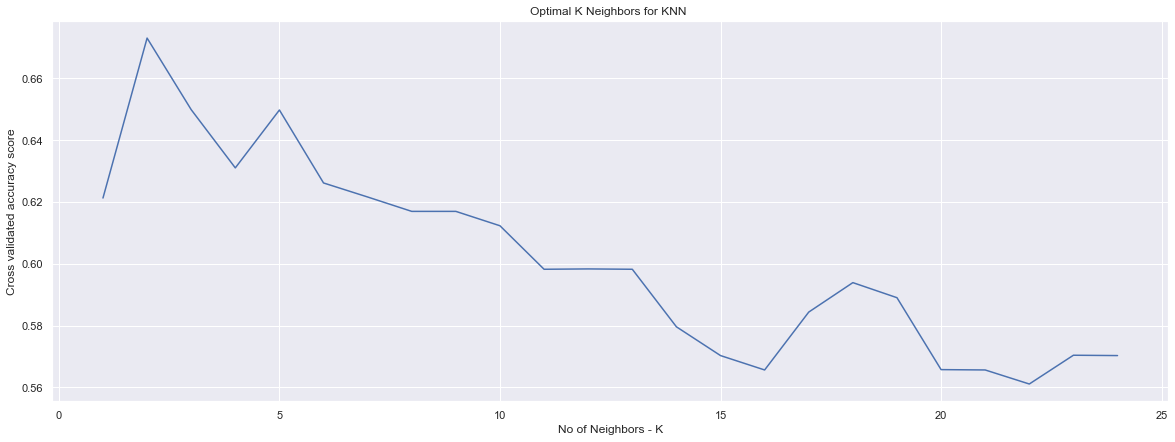

In [22]:
plt.figure(figsize=(20,7))

plt.plot(range(1,25),k_scores)

plt.xlabel('No of Neighbors - K')
plt.ylabel('Cross validated accuracy score')
plt.title('Optimal K Neighbors for KNN ')

## KNN Model

In [23]:
knn = KNeighborsClassifier(n_neighbors=2)
result_2 = cross_val_score(knn,x,y,cv=5,scoring='accuracy')
result_2.mean()


0.6729789590254706

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
result_3 = cross_val_score(knn,x,y,cv=5,scoring='accuracy')

result_3.mean()

0.6498338870431895

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
result_5 = cross_val_score(knn,x,y,cv=5,scoring='accuracy')

result_5.mean()

0.6497231450719824